In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [34]:
dateparse= lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d')
data=pd.read_csv('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Demandas_treinamento/demandas',parse_dates=['date'],index_col='date',date_parser=dateparse)['demandas']

C:\Users\marcio\AppData\Local\Temp\ipykernel_12148\2516921193.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse= lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d')


$d_{i} = 10000+400\cos\left(\frac{2\pi\left(i+10\right)}{50}+0.6\pi\right)+e_{i}$

$e_{i} \sim N\left(0,30\right)$

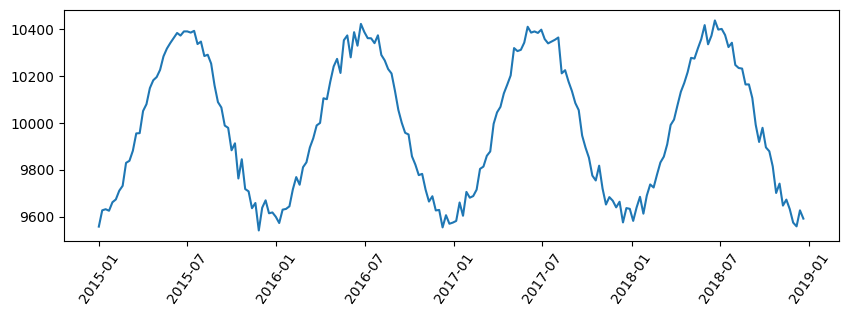

In [35]:
fig=plt.figure(figsize=(10,3))
ax=fig.add_subplot(1,1,1)
plt.plot(data)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)

(array([24., 36., 13., 21., 13., 13., 15., 18., 25., 30.]),
 array([ 9540.90453369,  9630.61532787,  9720.32612205,  9810.03691624,
         9899.74771042,  9989.4585046 , 10079.16929879, 10168.88009297,
        10258.59088715, 10348.30168133, 10438.01247552]),
 <BarContainer object of 10 artists>)

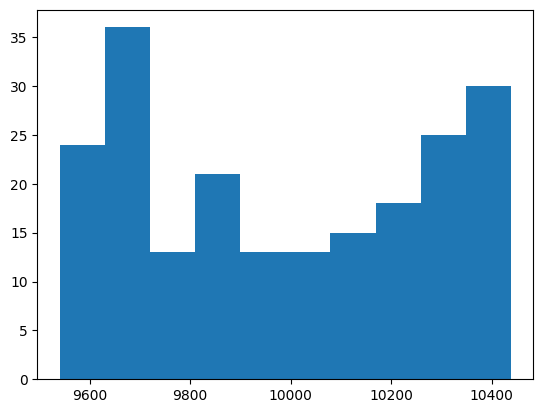

In [36]:
plt.hist(data)

In [37]:
data.describe()

count      208.000000
mean      9986.018452
std        287.916261
min       9540.904534
25%       9704.369126
50%       9979.283187
75%      10275.848594
max      10438.012476
Name: demandas, dtype: float64

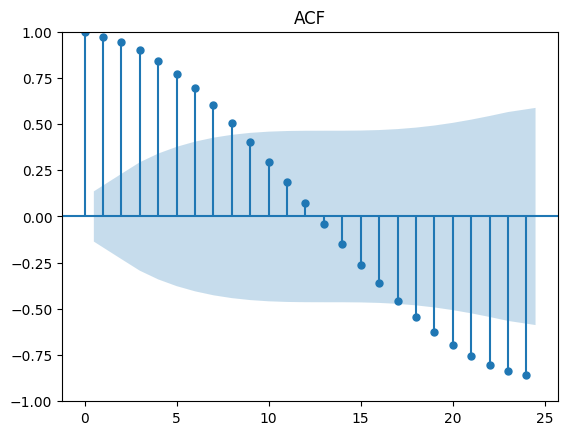

In [38]:
plot_acf(data,title='ACF')
plt.show()

C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


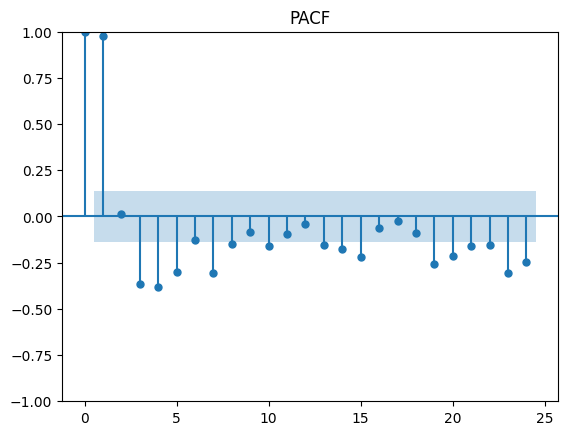

In [39]:
plot_pacf(data,title='PACF')
plt.show()

In [40]:
decom = seasonal_decompose(data)

<AxesSubplot: xlabel='date'>

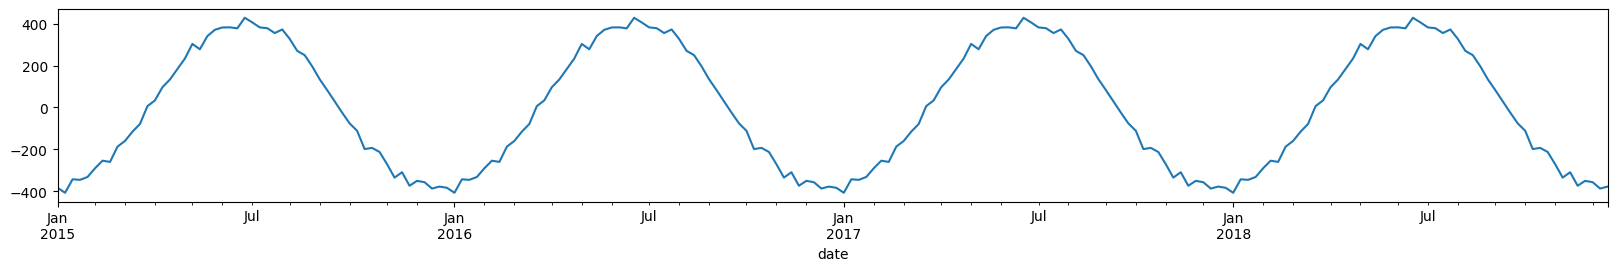

In [41]:
decom.seasonal.plot(figsize=(20,2.5))

<AxesSubplot: xlabel='date'>

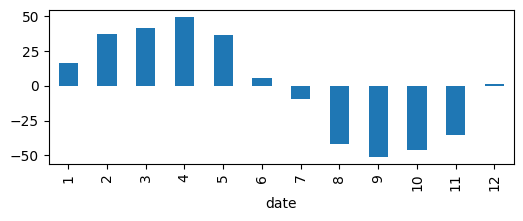

In [42]:
fig=plt.figure(figsize=(6,2))
data.diff().groupby(data.index.month).mean().plot(kind='bar')

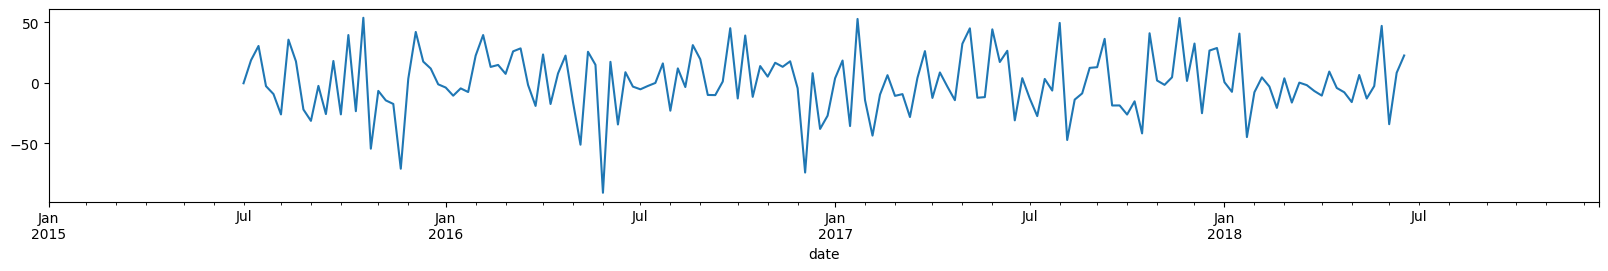

In [43]:
decom.resid.plot(figsize=(20,2.5));

<AxesSubplot: xlabel='date'>

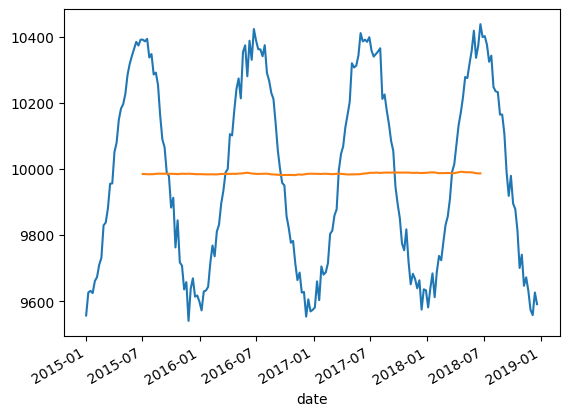

In [44]:
plt.plot(data)
decom.trend.plot()

$\hat{d}_{i} = \frac{d_{i-1}+d_{i-2}}{2}$

In [45]:
media_movel = data.rolling(3).mean()

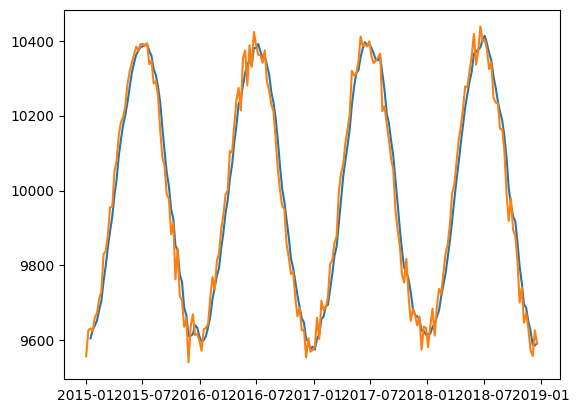

In [46]:
plt.plot(media_movel)
plt.plot(data)